In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/test_data.csv')

In [ ]:
df

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...
14635,14636,positive,KristenReenders,thank you we got on a different flight to Chic...,22/02/15 12:01,NaN,NaN
14636,14637,negative,itsropes,leaving over 20 minutes Late Flight. No warnin...,22/02/15 11:59,Texas,NaN
14637,14638,neutral,sanyabun,Please bring American Airlines to #BlackBerry10,22/02/15 11:59,"Nigeria,lagos",NaN
14638,14639,negative,SraJackson,"you have my money, you change my flight, and d...",22/02/15 11:59,New Jersey,Eastern Time (US & Canada)


In [ ]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [ ]:
df=df[['text','sentiment']]

In [ ]:
df

,text,sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experience... tacky.,positive
2,I didn't today... Must mean I need to take another trip!,neutral
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have ...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chicago.,positive
14636,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late ...,negative
14637,Please bring American Airlines to #BlackBerry10,neutral
14638,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so ...",negative


In [ ]:
len(df)

14640

In [ ]:
## Exploratory data analysis

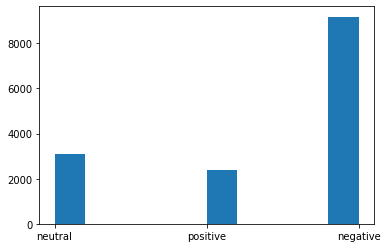

In [ ]:
plt.hist(df['sentiment'])
plt.show()

count    14640.000000
mean        16.682855
std          7.823469
min          1.000000
25%         11.000000
50%         18.000000
75%         22.000000
max        290.000000
Name: text, dtype: float64


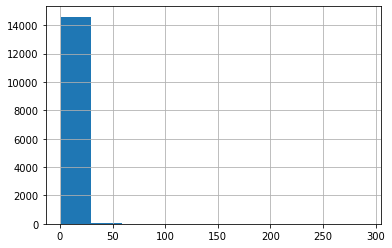

In [ ]:
lens = df.text.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(df.text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
flight,3930
get,1344
co,1213
http,1154
thanks,1072
cancelled,1062
service,965
help,869
time,793
customer,756


In [ ]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(df.text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
http co,1154
customer service,562
cancelled flightled,507
late flight,249
cancelled flighted,226
flight cancelled,202
late flightr,157
fleet fleek,145
booking problems,144
cancelled flight,144


Data Cleaning for NLP

In [ ]:
df['text'] = df['text'].astype(str)
df = df[~df["text"].isnull()]


In [ ]:
!pip install contractions

     |████████████████████████████████| 106 kB 5.4 MB/s 
     |████████████████████████████████| 287 kB 35.3 MB/s 


In [ ]:
from bs4 import BeautifulSoup
import unicodedata
import contractions
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

df['text1'] = df['text'].apply(lambda x: strip_html_tags(x))
df['text1'] = df['text1'].apply(lambda x: remove_accented_chars(x))
df['text1'] = df['text1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text1'] = df['text1'].apply(lambda x: contractions.fix(x))
df['text1'] = df['text1'].str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


In [ ]:
df

,text,sentiment,text1
0,What @dhepburn said.,neutral,what dhepburn said
1,plus you've added commercials to the experience... tacky.,positive,plus you have added commercials to the experience tacky
2,I didn't today... Must mean I need to take another trip!,neutral,i did not today must mean i need to take another trip
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have ...",negative,it is really aggressive to blast obnoxious entertainment in your guests faces they have little ...
4,and it's a really big bad thing about it,negative,and it is a really big bad thing about it
...,...,...,...
14635,thank you we got on a different flight to Chicago.,positive,thank you we got on a different flight to chicago
14636,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late ...,negative,leaving over 20 minutes late flight no warnings or communication until we were 15 minutes late f...
14637,Please bring American Airlines to #BlackBerry10,neutral,please bring american airlines to blackberry10
14638,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so ...",negative,you have my money you change my flight and do not answer your phones any other suggestions so i ...


In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sw_spacy.add('amp')
sw_spacy.remove('not')
sw_spacy.remove('no')
print(sw_spacy)

{'many', 'from', 'alone', 'onto', 'towards', '‘ve', 'throughout', 'noone', 'although', 'you', 'due', 'regarding', 'every', 'made', 'back', 'since', 'hereafter', 'beforehand', 'sometime', 'amount', 'anywhere', 'above', 'been', 'after', 'would', 'those', 'everyone', 'either', 'n’t', 'our', 'whoever', 'using', '‘m', 'must', 'to', 'former', 'everything', 'put', 'did', "'ve", 'through', 'my', 'via', 'several', 'below', 'nothing', 'none', 'enough', 'yours', 'herself', 'during', 'because', 'first', 'upon', '’m', 'ever', 'me', 'becomes', 'which', 'never', 'this', "'ll", 're', 'against', 'say', 'may', 'nowhere', 'what', 'nine', 'hereupon', 'also', 'so', 'together', 'being', 'becoming', 'therein', 'these', 'ten', 'herein', 'cannot', 'sixty', 'serious', 'such', 'all', 'him', 'however', 'were', 'of', 'whether', 'except', 'they', 'last', 'became', 'up', '‘d', 'over', 'while', 'wherever', 'one', 'here', 'meanwhile', 'other', 'four', 'whereafter', 'eight', 'still', 'part', 'there', "'re", 'else', 'be

In [ ]:
df['text1'] = df['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in sw_spacy))
df['text1'].head()

0                                                            dhepburn said
1                                  plus added commercials experience tacky
2                                                 not today mean need trip
3    aggressive blast obnoxious entertainment guests faces little recourse
4                                                            big bad thing
Name: text1, dtype: object

In [ ]:
def lemmatize_text(text):
    text = en(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
df['text1'] = df['text1'].apply(lambda x: lemmatize_text(x))

count    14640.000000
mean         8.576366
std          4.385722
min          0.000000
25%          6.000000
50%          9.000000
75%         11.000000
max        157.000000
Name: text1, dtype: float64


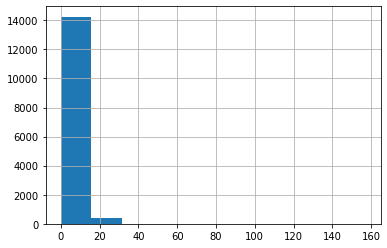

In [ ]:
lens = df.text1.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(df.text1)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=True).head(100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
0011,1
jburg,1
jcolenc,1
jdbwaffle,1
jdhadp,1
...,...
iove,1
ipaddo,1
ipodtouch,1
iraiq,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(df.text1)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
flight,4580
thank,1749
hour,1128
cancel,1053
service,987
delay,943
help,934
time,928
customer,927
get,772


In [ ]:
df

,text,sentiment,text1
0,What @dhepburn said.,neutral,dhepburn say
1,plus you've added commercials to the experience... tacky.,positive,plus add commercial experience tacky
2,I didn't today... Must mean I need to take another trip!,neutral,not today mean need trip
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have ...",negative,aggressive blast obnoxious entertainment guest face little recourse
4,and it's a really big bad thing about it,negative,big bad thing
...,...,...,...
14635,thank you we got on a different flight to Chicago.,positive,thank get different flight chicago
14636,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late ...,negative,leave 20 minute late flight no warning communication 15 minute late flight call shitty customer svc
14637,Please bring American Airlines to #BlackBerry10,neutral,bring american airlines blackberry10
14638,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so ...",negative,money change flight not answer phone suggestion commitment


In [ ]:
df.sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [ ]:
label_dict={'neutral':0,'positive':1,'negative':2}
df['label'] = df['sentiment'].map(label_dict)
df.head()

,text,sentiment,text1,label
0,What @dhepburn said.,neutral,dhepburn say,0
1,plus you've added commercials to the experience... tacky.,positive,plus add commercial experience tacky,1
2,I didn't today... Must mean I need to take another trip!,neutral,not today mean need trip,0
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have ...",negative,aggressive blast obnoxious entertainment guest face little recourse,2
4,and it's a really big bad thing about it,negative,big bad thing,2


Model Building

In [ ]:
# Splitting into training & test subsets
X=df['text1']
y=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True,
                                                    random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer()
X_train_tfidf = td.fit_transform(X_train).toarray()

Hyper Parameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters ={'max_depth': [50, 60, 70, 80, 90, 100],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [400,600]}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=parameters,verbose=1, n_jobs=-1,
                            )
random_result = random_search.fit(X_train_tfidf, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
X_test_tfidf = td.transform(X_test).toarray()
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
y_pred_train = classifier.predict(X_train_tfidf)

In [ ]:
# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.7686703096539163

Classification Report

               precision    recall  f1-score   support

           0       0.61      0.48      0.53       919
           1       0.75      0.56      0.64       685
           2       0.81      0.92      0.86      2788

    accuracy                           0.77      4392
   macro avg       0.72      0.65      0.68      4392
weighted avg       0.76      0.77      0.76      4392



Checking for overfitting in training data

In [ ]:
# Classification metrics for training data
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_train, y_pred_train)
print('\n Accuracy: ', accuracy_score(y_train, y_pred_train))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.9922911787665886

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2180
           1       0.98      0.99      0.99      1678
           2       1.00      0.99      1.00      6390

    accuracy                           0.99     10248
   macro avg       0.99      0.99      0.99     10248
weighted avg       0.99      0.99      0.99     10248



In [ ]:
from sklearn import metrics
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[ 437   81  401]
 [  92  386  207]
 [ 190   45 2553]]


Deep Learning Bert Model for text classification

In [ ]:
X=list(df['text1'])
y=list(df['label'])

In [ ]:
X

['dhepburn say',
 'plus add commercial experience tacky',
 'not today mean need trip',
 'aggressive blast obnoxious entertainment guest face little recourse',
 'big bad thing',
 'seriously pay 30 flight seat not play bad thing fly va',
 'yes nearly time fly vx _ _ ar worm _ win _ _ away',
 'miss prime opportunity man hat parody httpstcomwpg7grezp',
 'didnt_but d',
 'amazing arrive hour early good',
 'know suicide second lead death teen 1024',
 '3 pretty graphic better minimal iconography d',
 'great deal think 2nd trip australia not go 1st trip p',
 'virginmedia fly fabulous seductive sky stress away travel httptcoahlxhhkiyn',
 'thank',
 'sfopdx schedule mia',
 'excited cross country flight lax mco hear great thing virgin america 29daystogo',
 'fly nyc sfo week not fully sit seat large gentleman help',
 '_ _ _ fly virginamerica _ _ _ _ _',
 'know amazingly awesome bosfll want fly',
 'fare times carrier seat available select',
 'love graphic httptcout5grrwaaa',
 'love hipster innovation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [4]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 33.0 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 596 kB 63.2 MB/s 
     |████████████████████████████████| 6.6 MB 60.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [22]:
df=pd.read_csv('/content/test_data.csv')

In [23]:
label_dict={'neutral':0,'positive':1,'negative':2}
df['label'] = df['sentiment'].map(label_dict)
df.head()

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone,label
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada),0
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada),1
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada),0
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada),2
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada),2


In [25]:
from tensorflow.keras.utils import to_categorical

In [50]:
X=df['text']
y=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True,
                                                    random_state = 0)

In [51]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [52]:
y_train1

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [32]:
!pip install transformers
import transformers

In [81]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file https://huggingface.co/bert-base-cased/resolve/main/voc

In [83]:
#Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=15,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=15,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [84]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [85]:
input_ids

<tf.Tensor: shape=(10248, 15), dtype=int32, numpy=
array([[  101,  1185,  2000, ...,   112,   182,   102],
       [  101,   138,  1849, ..., 13020,  2162,   102],
       [  101, 25120,  2541, ...,  1120,  1314,   102],
       ...,
       [  101,  1103,   119, ...,  1200, 14301,   102],
       [  101,  1440,   106, ...,   137,  3066,   102],
       [  101,  1128,  1132, ...,  1113,   122,   102]], dtype=int32)>

In [86]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [87]:
max_len = 15
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(3,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [88]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [89]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train1,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test1
    ),
  epochs=2,
    batch_size=36
)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


285/285 [==============================] - 68s 168ms/step - loss: 0.6268 - balanced_accuracy: 0.7452 - val_loss: 0.5480 - val_balanced_accuracy: 0.7846
Epoch 2/2
285/285 [==============================] - 47s 165ms/step - loss: 0.4224 - balanced_accuracy: 0.8417 - val_loss: 0.5524 - val_balanced_accuracy: 0.7839


In [90]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

array([0.5107067 , 0.26342127, 0.9561509 ], dtype=float32)

In [91]:
y_predicted = np.argmax(predicted_raw, axis = 1)


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       919
           1       0.74      0.67      0.71       685
           2       0.85      0.87      0.86      2788

    accuracy                           0.78      4392
   macro avg       0.73      0.71      0.72      4392
weighted avg       0.78      0.78      0.78      4392



In [93]:
texts = "you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you."
x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=15,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
for key , value in zip(label_dict.keys(),validation[0]):
    print(key,value)

neutral 55.36552
positive 83.36706
negative 20.436497


In [95]:
p=np.argmax(validation,axis=1)
print(p)

[1]


Sentence Similarity

In [96]:
df=pd.read_csv('/content/test_data.csv')

In [97]:
pip install sentence-transformers

     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=be20dac99f143e644af419db59c7ade3c4ef5fa3770d794c9ae9427ac1bc29d9
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers


In [98]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

In [99]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

loading configuration file /root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/config.json
Model config BertConfig {
  "_name_or_path": "/root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file /root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/pytorch_model.bin
All model checkpoint weights were used when i

In [100]:
corpus=df['text'].to_list()

In [101]:
corpus

['What @dhepburn said.',
 "plus you've added commercials to the experience... tacky.",
 "I didn't today... Must mean I need to take another trip!",
 'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "and it's a really big bad thing about it",
 "seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 'yes, nearly every time I fly VX this __ar worm_ won__ go away :)',
 'Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 "Well, I didn't_but NOW I DO! :-D",
 "it was amazing, and arrived an hour early. You're too good to me.",
 'did you know that suicide is the second leading cause of death among teens 10-24',
 'I &lt;3 pretty graphics. so much better than minimal iconography. :D',
 "This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
 "

In [109]:
# encode corpus to get corpus embeddings
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
sentence =df.loc[df['tweet_id'] == 8233, 'text'].to_list()
# encode sentence to get sentence embeddings
sentence_embedding = model.encode(sentence, convert_to_tensor=True)
# top_k results to return
top_k = min(10, len(corpus))
for sent in sentence:
    query_embedding = model.encode(sent, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", sent)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: here in Austin I saw the water bottles &amp; snacks @ the desk for your waiting passengers! Im so Flight Booking Problems my next flight with you!

Top 5 most similar sentences in corpus:
here in Austin I saw the water bottles &amp; snacks @ the desk for your waiting passengers! Im so Flight Booking Problems my next flight with you! (Score: 1.0000)
That is not very gracious of @jetblue to tell me where I can go BUY water or a snack when our flight is delayed over 3 hours. (Score: 0.6979)
we've been seating for 5hrs inside flight UA936 at #IAD delayed. We've only been offered water &amp; cookies in business class. #failed (Score: 0.6034)
the people at the counter have been very helpful. As you can see nobody is there. Flight to Austin 10:55 and still sitting here. (Score: 0.6034)
I adore you, and am so looking forward to my flight to Austin in two weeks. (Score: 0.5852)
I've got a BA flight as your airport couldn't accommodate us. We were left without any info. No vouchers fo

In [104]:
sentence

8232    here in Austin I saw the water bottles &amp; s...
Name: text, dtype: object